In [34]:
!pip install kaggle

In [35]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

In [36]:
!chmod 600 ~/.kaggle/kaggle.json

In [37]:
!ls ~/.kaggle

kaggle.json


In [38]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification --unzip

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
df = pd.read_csv("Training_set.csv")
df.head(10)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
5,Image_6.jpg,CAIRNS BIRDWING
6,Image_7.jpg,GREEN CELLED CATTLEHEART
7,Image_8.jpg,EASTERN DAPPLE WHITE
8,Image_9.jpg,BROWN SIPROETA
9,Image_10.jpg,RED POSTMAN


In [41]:
len(df)

6499

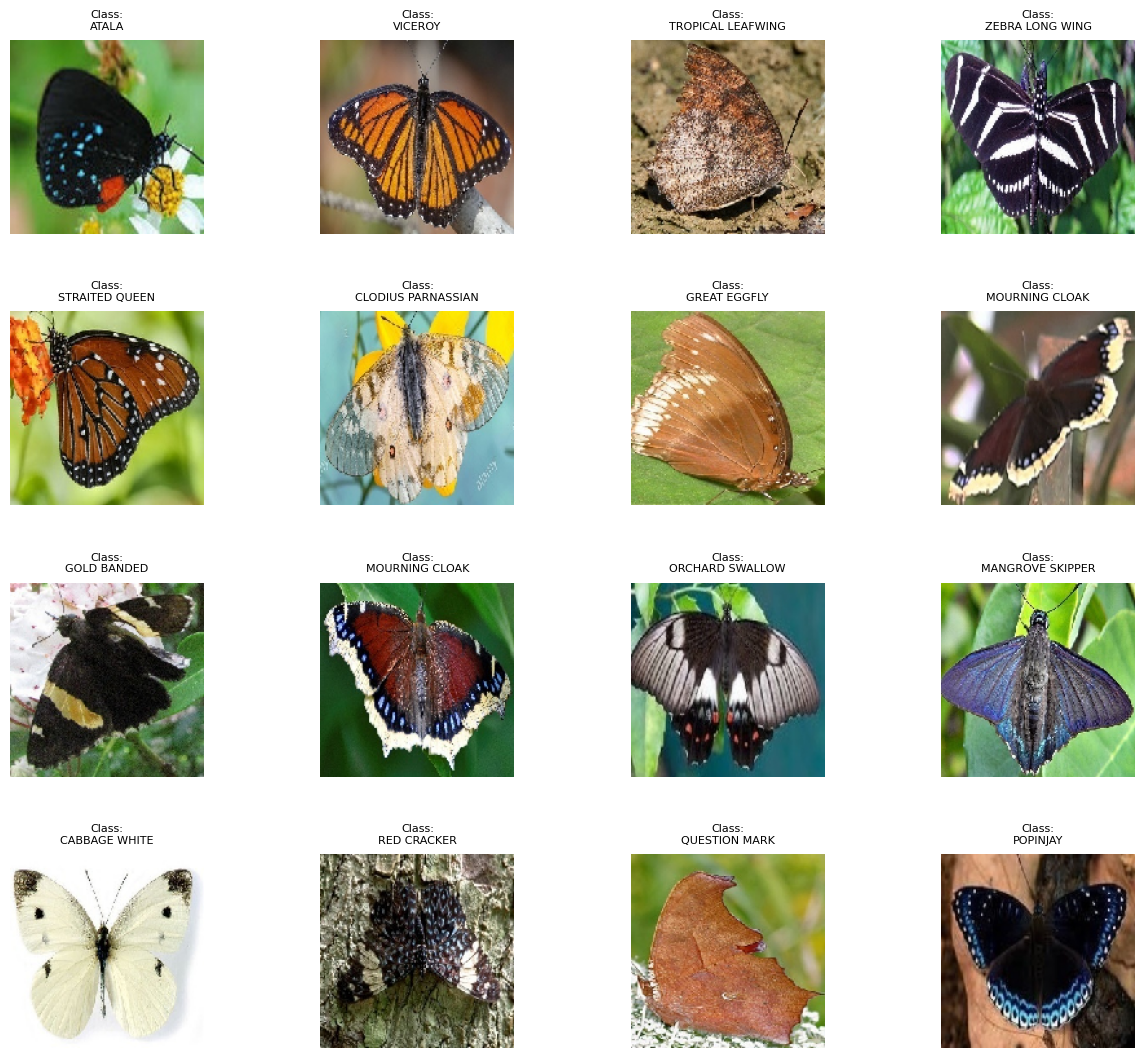

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define image directory and CSV DataFrame
image_dir = "train/"

# Randomly select 16 sample images
indices = np.random.randint(0, len(df), size=16)

# Create a 4x4 grid for displaying images
fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Increased figure size
axes = axes.flatten()

# Loop through selected images and display them
for i, ax in enumerate(axes):
    row = df.iloc[indices[i]]
    img_path = os.path.join(image_dir, row['filename'])

    # Load and normalize the image
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  # Normalize the image

    # Display the image
    ax.imshow(img_array)

    # Properly wrap and display class labels
    class_label = row['label']
    ax.set_title(f"Class:\n{class_label}", fontsize=8, pad=8)  # Smaller font, extra padding
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.4, wspace=0.3)  # Better control over spacing
plt.show()

In [43]:
# Split dataset into 80% training and 20% validation
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the directory where images are stored
image_dir = "train/"

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalize pixel values to [0, 1]
    rotation_range=40,             # Randomly rotate images
    width_shift_range=0.2,         # Shift width by 20%
    height_shift_range=0.2,        # Shift height by 20%
    shear_range=0.2,               # Apply shear transformations
    zoom_range=0.2,                # Randomly zoom in/out
    horizontal_flip=True,          # Flip images horizontally
    fill_mode='nearest'            # Fill missing pixels
)

# Rescaling for validation images (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Validation data generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


In [44]:
model = Sequential()

In [45]:
# Initialize the Sequential model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Dropout layer to prevent overfitting after flattening
model.add(Dropout(rate=0.5))  # Drop 50% of the neurons during training

# Fully connected layers
model.add(Dense(units=512, activation='relu'))

# Optional dropout between dense layers (if needed)
# model.add(layers.Dropout(rate=0.3))

# Output layer for 75 classes using softmax
model.add(Dense(units=75, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 75)                  │          38,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,072,139 (72.75 MB)

 Trainable params: 19,072,139 (72.75 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Fit the CNN model on the training data
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=1
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.1806 - loss: 3.1374 - val_accuracy: 0.2854 - val_loss: 2.7125
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.2934 - loss: 2.6073 - val_accuracy: 0.3946 - val_loss: 2.1956
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.3792 - loss: 2.2131 - val_accuracy: 0.4785 - val_loss: 1.8542
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.4489 - loss: 1.9512 - val_accuracy: 0.4854 - val_loss: 1.8619
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.4752 - loss: 1.7978 - val_accuracy: 0.5277 - val_loss: 1.6602
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.5185 - loss: 1.6492 - val_accuracy: 0.5731 - val_loss: 1.4783
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.5703 - loss: 1.5086 - val_accuracy: 0.6231 - val_loss: 1.3190
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.5836 - loss: 1.4063 - val_accu

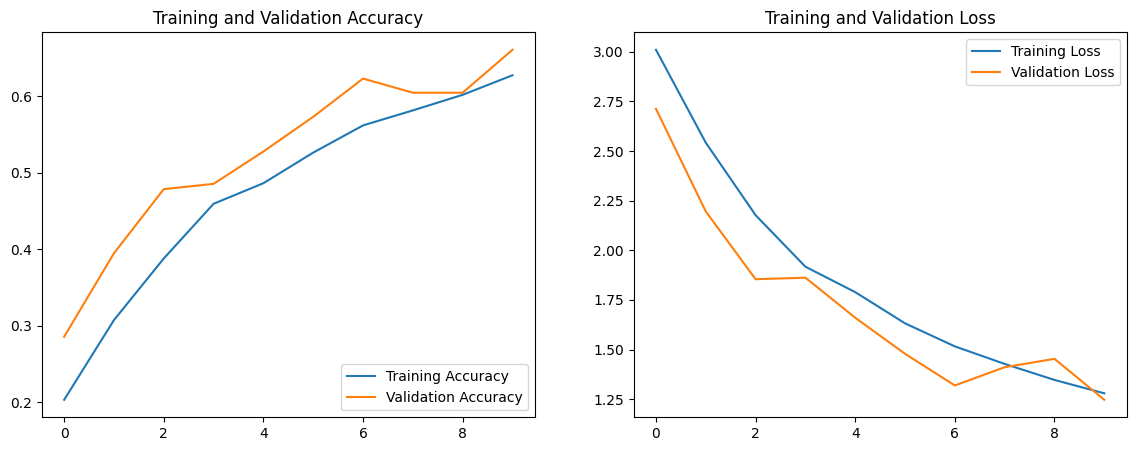

In [49]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./fig.png')
plt.show()